In [1]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
mongo = client.hai

In [2]:
import time
from datetime import datetime, date
import calendar

start_time = time.time()-3600#calendar.timegm(date(2017, 10, 31).timetuple())
end_time = time.time()#calendar.timegm(date(2017, 11, 2).timetuple())
username = "sean"

In [34]:
query = {"user_name": username, "summary":{"$exists": True}, "time": {"$gt": start_time, "$lt": end_time}}
cams = mongo.images.find(query).distinct("cam_id")
print(cams)

['misc0']


In [46]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

import controllers.learner.datasets as ds
ds.port = 27017

In [47]:
query = {"user_name": username, "time": {"$gt": time.time()-7200, "$lt": time.time()}}
print_data = list(mongo.print.find(query))
print(len(print_data))

8


In [54]:
import scipy.misc
import matplotlib.pyplot as plt

%matplotlib inline

image_data = ds.get_event_images(username, print_data, ["misc0"])

In [55]:
print(len(print_data), len(image_data))

8 8


mask


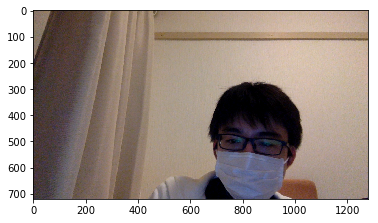

mask


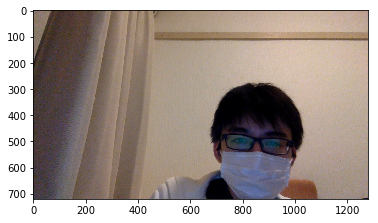

mask


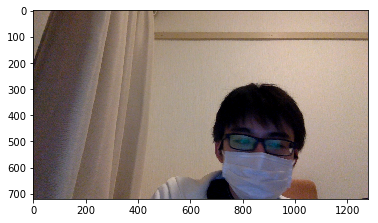

mask


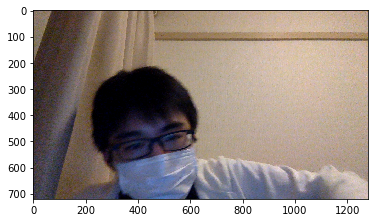

mask


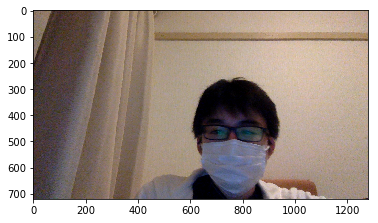

mask


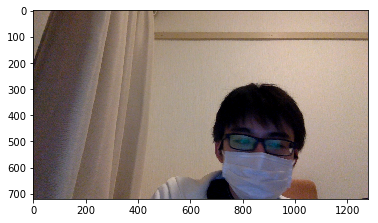

mask


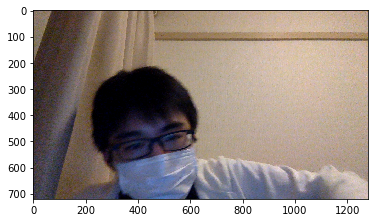

mask


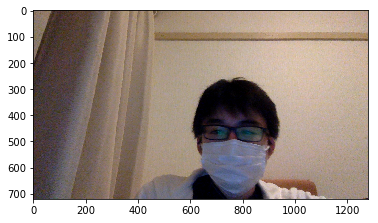

mask


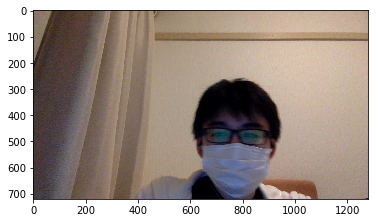

mask


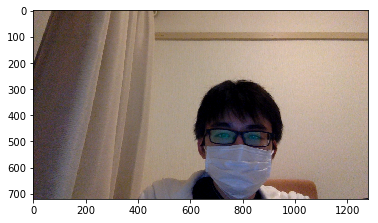

nomask


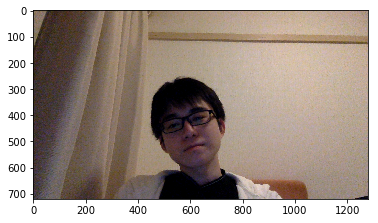

nomask


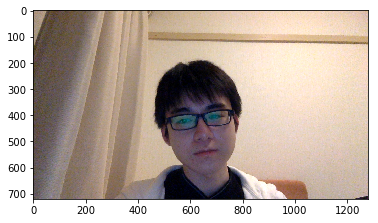

nomask


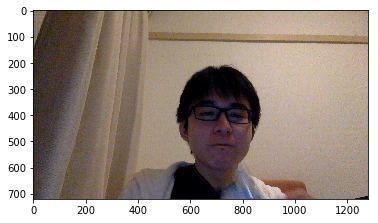

nomask


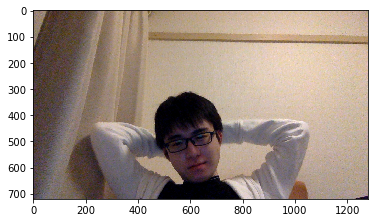

nomask


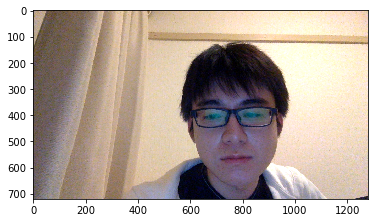

nomask


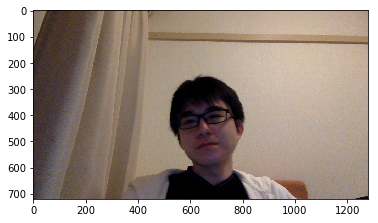

gone


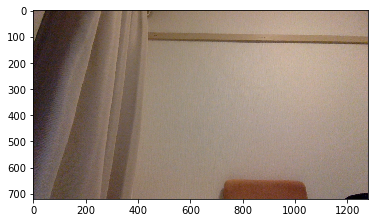

gone


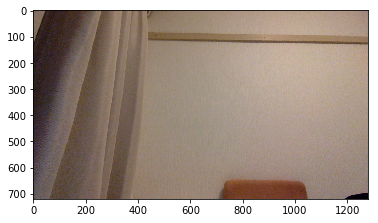

gone


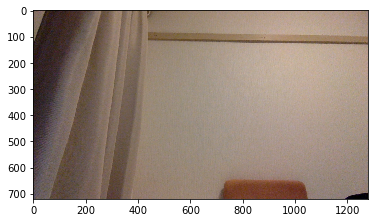

gone


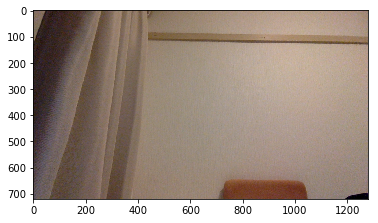

gone


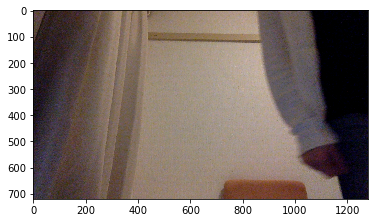

gone


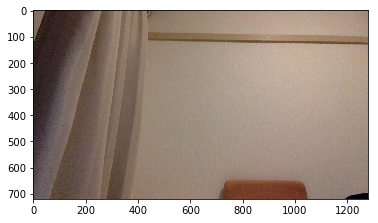

mask


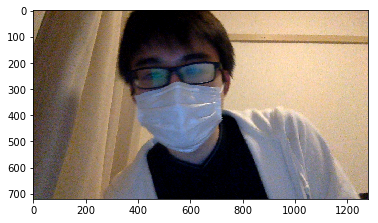

mask


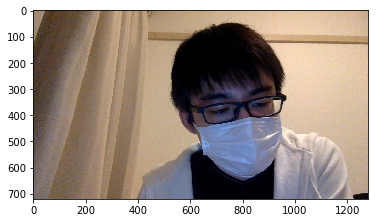

mask


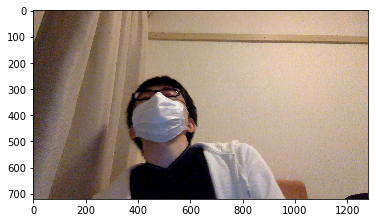

mask


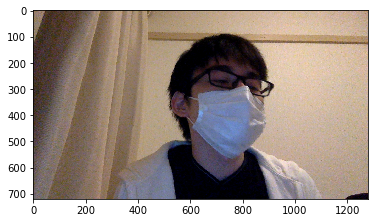

mask


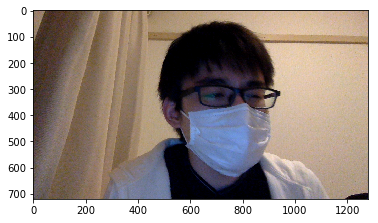

mask


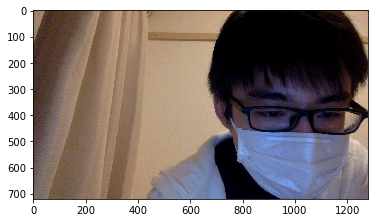

nomask


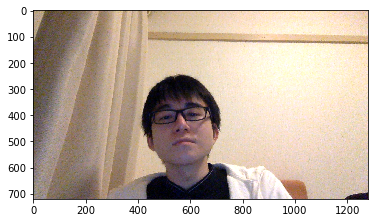

nomask


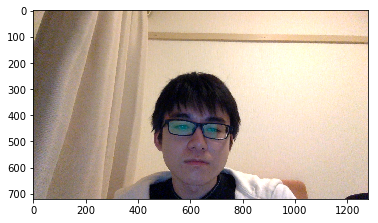

nomask


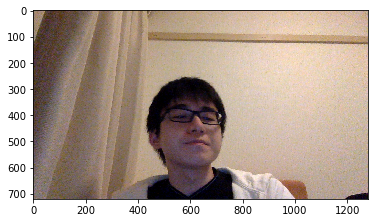

nomask


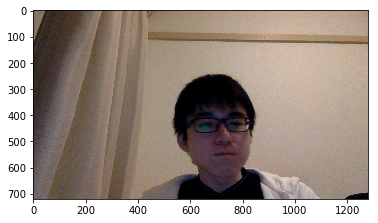

nomask


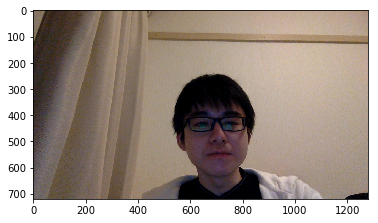

nomask


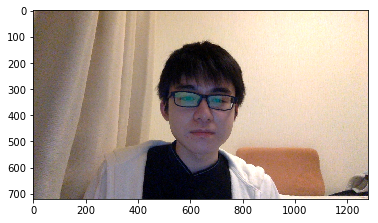

In [56]:
import numpy as np

dataX, dataY = [], []
classes = list(set([y["text"] for y in print_data]))

for x, y in zip(image_data, print_data):
    for imgs in x:
        row = []
        skip = False
        for cam in imgs:
            if cam is not None:
                print(y["text"])
                plt.figure()
                plt.imshow(scipy.misc.imread("./images/raw_images/" + cam["filename"]))
                plt.show()
                row.append(ds.data2vec([], [], cam, False, False, False, True, False, False))
            else:
                skip = True
                break
        if not skip:
            dataX.append(np.concatenate(row))
            dataY.append(classes.index(y["text"]))

In [51]:
print(len(dataX), dataY)

34 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0]
